# <font color='limegreen'>El método Tight Binding 

---


## Team Materials
Integrantes: 
*   Ruben Ortiz
*   Andrés Chicaiza
*   Kevin Cárdenas
* Selena Barragán

# ¿Qué es el modelo Tight Binding?
##Conceptos fundamentales
### -Red de Cristal
Es una disposición periódica e infinita de las unidades propias de un sólido, pueden ser átomos,  moléculas, iones, etc. distribuidos en el espacio, de tal manera que cada unidad se ubica en un punto específico  denominado  punto  de  red. En  la  Figura  (a) se  muestra  una  red  hexagonal  bidimensional, cada punto de red representa una molécula formada por dos átomos en este caso  diferentes. En la Figura (b) se muestra una red bidimensional cuadrada, cada punto representa un átomo.

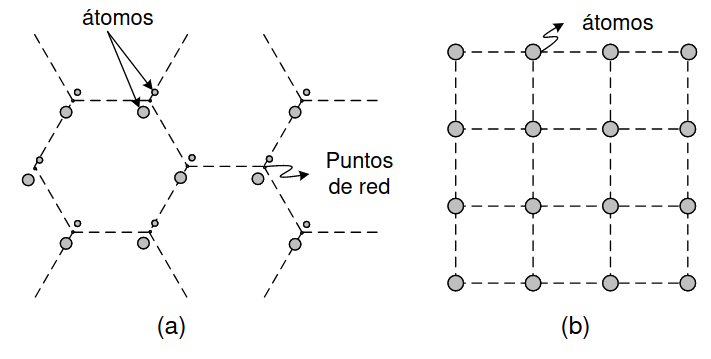

### -Ecuación de Scrhödinger para un Cristal
Ejemplo particular: Como la distancia interatómica entre los iones de un cristal es del orden de $10^{−8}$ cm (1 Å), para conocer los estados estacionarios y niveles de energía de un cristal se debe resolver la ecuación de Schrödinger para todo el sistema de partículas, electrones y núcleos, que forman el sólido, es decir:

$$\hat{H}\Psi=E\Psi$$

donde el primer término de la izquierda es el hamiltoniano que toma en cuenta la energía cinética de todos los electrones y los núcleos respectivamente, (tomando en cuenta la  masa  del electrón y la masa del núcleo), la energía potencial de interacción de electrones de dos en dos entre sí, la energía potencial de interacción de los núcleos de dos en dos y por último la energía potencial de interacción entre los electrones con los núcleos.

## Método Tight-Binding

En el modelo Tight-Binding se considera a los sólidos como una colección de átomos neutros interactuando débilmente, esto se asume debido a que existen diversos sólidos cuyos átomos tienen potenciales relativamente grandes tal que los electrones se encuentran, en su mayoría, ligados a los núcleos, como en los semiconductores y aislantes. Se asume entonces que el estado del electrón 
en el cristal se diferencia poco de su estado aislado o neutro, por lo que se  utiliza la teoría de perturbaciones considerando al hamiltoniano del cristal como al hamiltoniano atómico más un término de corrección.

### Combinación lineal de orbitales atómicos 

Si se realiza un experimento ideal, en el que se tiene un cristal cuya constante de red es muy grande (del orden de los centímetros), los átomos se encuentran tan alejados que se puede asumir que no existe interacción entre  ellos, considerándolos como aislados o neutros, al disminuir la constante de red, llegará un momento en que estos empezarán a interactuar entre sí, 
variando algunos estados, y por lo tanto los niveles electrónicos más externos de cada átomo. Entonces, un objetivo puede ser analizar cómo se modifican los estados de los electrones en los átomos aislados a medida que los átomos se acercan hasta formar la red real.  
Entonces, para un átomo aislado, según la mecánica cuántica los electrones están descritos por funciones de onda, que dependen de los números cuánticos $𝑛,𝑙,𝑚,𝑠$, describiendo el estado en el que se encuentran. Además, los niveles de energía de los electrones son ocupados según el Principio de exclusión de Pauli.

La constante de red hace referencia a la distancia constante de las celdas unitarias o "dimensión de cada celda".



## Aplicando el modelo tight binding a la molécula de hidrógeno:

Buscamos cuantificar la interacción entre los dos átomos que conforman a la molécula $H_2$. Para esto definimos dos funciones base para este sistema: 
$| R_1 \rangle$, $| R_2 \rangle$. Ahora, el Hamiltoniano asociado a este sistema se escribe como

$$ H = \begin{pmatrix}
\langle R_1| H |R_1 \rangle & \langle R_1| H |R_2 \rangle \\
\langle R_2| H |R_1 \rangle & \langle R_2| H |R_2 \rangle
\end{pmatrix}$$


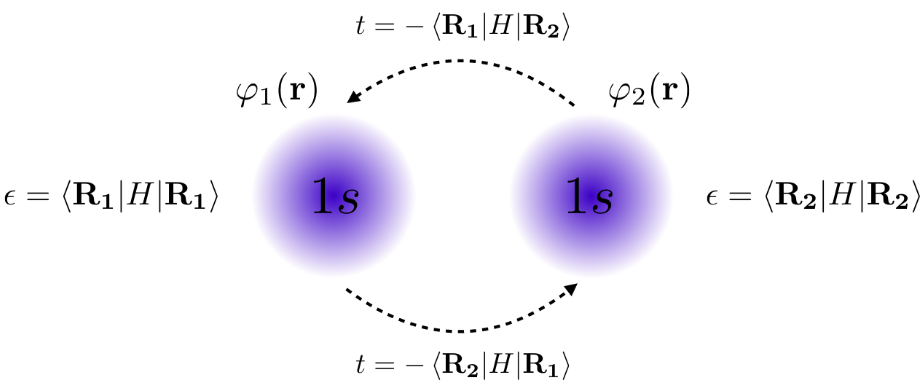

$$ H = \begin{pmatrix}
\epsilon & -t \\
-t & \epsilon 
\end{pmatrix}$$

con $\epsilon>0$ la energía del electrón en cada orbital 1s de su respectivo átomo de $H$ y $t>0$ la energía de interacción entre los electrones de diferentes átomos.

Siendo así, tomando en cuenta la matriz de superposición  se escribe a la ecuación de Schrödinger 

$$H |\psi \rangle = E |\psi \rangle$$
$$\langle R_i| H |\psi \rangle = E \langle R_i|\psi \rangle \quad \forall i=1,2$$
$$ \begin{pmatrix}
\epsilon & -t \\
-t & \epsilon 
\end{pmatrix}|\psi\rangle = E \begin{pmatrix}
1 & S \\
S & 1
\end{pmatrix}|\psi\rangle$$

con $S = \langle R_1|R_2\rangle$. Resolviendo el problema de valores propios, $E$ se escribe como
$$E_{S/AS} = \frac{\epsilon \mp t}{1 \pm S}$$ y aplicando el modelo de tight binding se hace que $S = 0$ para escribir a las energías y a las funciones de onda como 

$$E_{S/AS} = \epsilon \mp t$$
$$|\psi_{S/AS}\rangle = \frac{1}{\sqrt{2}}(|R_1\rangle\pm |R_2\rangle)$$


In [3]:
#Instalo Pythtb
!pip install pythtb 

# import the pythtb module
from pythtb import *
import numpy as np
# geometry: bond length and half bond-angle
b=1.0; angle=54.0*np.pi/180
# site energies [O(s), O(p), H(s)]
eos=-1.5; eop=-1.2; eh=-1.0
# hoppings [O(s)-H(s), O(p)-H(s)]
ts=-0.4; tp=-0.3
# define frame for defining vectors: 3D Cartesian
lat=[[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]]
# define coordinates of orbitals: O(s,px,py,pz) ; H(s) ; H(s)
orb=[ [0.,0.,0.], [0.,0.,0.], [0.,0.,0.], [0.,0.,0.], [b*np.cos(angle), b*np.sin(angle),0.],[b*np.cos(angle),-b*np.sin(angle),0.] ]
# define model
my_model=tbmodel(0,3,lat,orb)
my_model.set_onsite([eos,eop,eop,eop,eh,eh])
my_model.set_hop(ts,0,4)
my_model.set_hop(ts,0,5)
my_model.set_hop(tp*np.cos(angle),1,4)
my_model.set_hop(tp*np.cos(angle),1,5)
my_model.set_hop(tp*np.sin(angle),2,4)
my_model.set_hop(-tp*np.sin(angle),2,5)
# print model
my_model.display()
# solve model
(eval,evec)=my_model.solve_all(eig_vectors=True)
# the model is real, so OK to discard imaginary parts of eigenvectors
evec=evec.real
# optional: choose overall sign of evec according to some specified rule
# (here, we make the average oxygen p component positive)
for i in range(len(eval)):
    if sum(evec[i,1:4]) < 0:
        evec[i,:]=-evec[i,:]
# print results, setting numpy to format floats as xx.xxx
np.set_printoptions(formatter={'float': '{: 6.3f}'.format})
# print eigenvalues and real parts of eigenvectors, one to a line.
print("  n   eigval   eigvec")
for n in range(6):
    print(" %2i  %7.3f  " % (n,eval[n]), evec[n,:])


---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 0
r-space dimension           = 3
number of spin components   = 1
periodic directions         = []
number of orbitals          = 6
number of electronic states = 6
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     1.0 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,     1.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  3  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  4  ===>  [  0.5878 ,   0.809 ,     0.0 ]
 #  5  ===>  [  0.5878 ,  -0.809 ,     0.0 ]
site energies:
 #  0  ===>      -1.5
 #  1  ===>      -1.2
 #  2  ===>      -1.2
 #  3  ===>      -1.2
 #  4  ===>      -1.0
 #  5  ===>      -1.0
hoppings:
<  0 | H |  4 >     ===>     -0.4 +     0.0 i
<  0 | H |  5 >     ===>     -0.4 +     0.0 i
<  

# <font color='Orange'>Breve análisis de una imagen de nanohojas de grafeno

https://colab.research.google.com/drive/1Q5y1cWv-J_-S8ftsRnpn3l1M5cquc64g?usp=sharing